# Employee Attrition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# from google.colab import drive
#drive.mount('/content/drive/MyDrive/HR_Employee_Attrition_dataset.csv')

ValueError: Mountpoint must be in a directory that exists

# Data preprocessing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/drive/MyDrive/Collab Datasets/HR_Employee_Attrition_dataset.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Encode target variable Attrition (Yes -> 1, No -> 0)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Attrition")
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split into training and testing sets (80-20 split)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print dataset info
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)


Training Set Shape: (1029, 34) (1029,)
Testing Set Shape: (441, 34) (441,)


<ipython-input-3-740964b02d13>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Attrition"], palette="coolwarm")


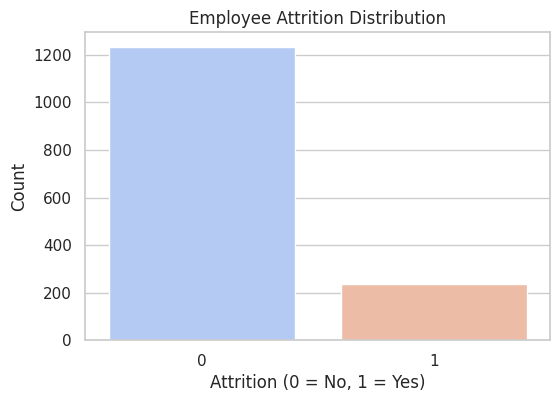

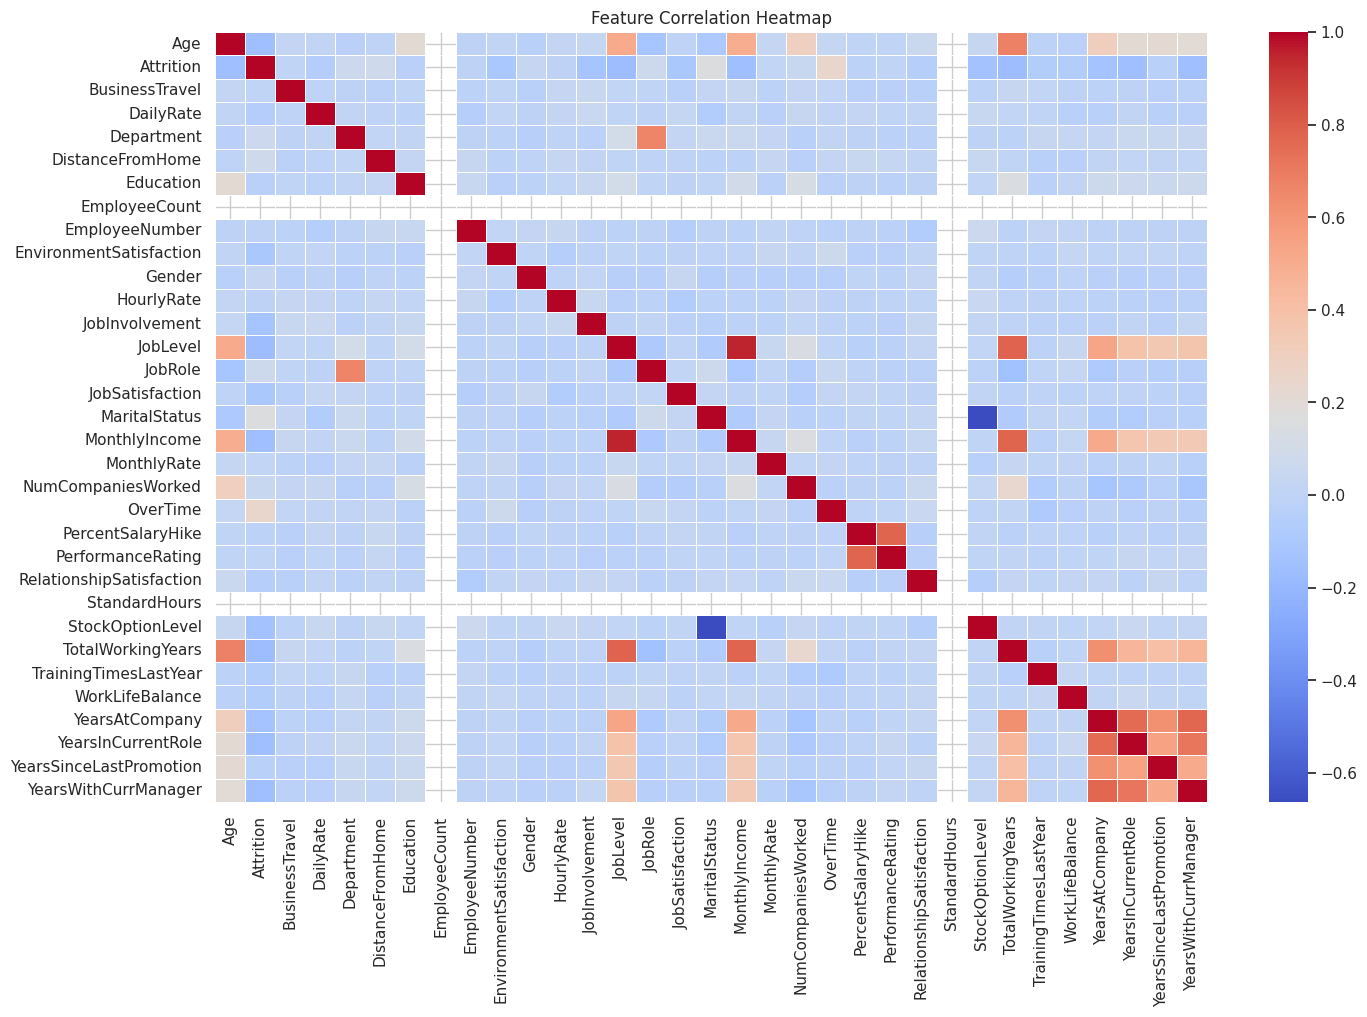

<ipython-input-3-740964b02d13>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"], y=df["YearsAtCompany"], palette="coolwarm", ax=axes[0, 0])
<ipython-input-3-740964b02d13>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"], y=df["JobSatisfaction"], palette="coolwarm", ax=axes[0, 1])
<ipython-input-3-740964b02d13>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Attrition"], y=df["TotalWorkingYears"], palette="coolwarm", ax=axes[1, 0])
<ipython-input-3-740964b02d13>:55: FutureWarning: 

Passing `palet

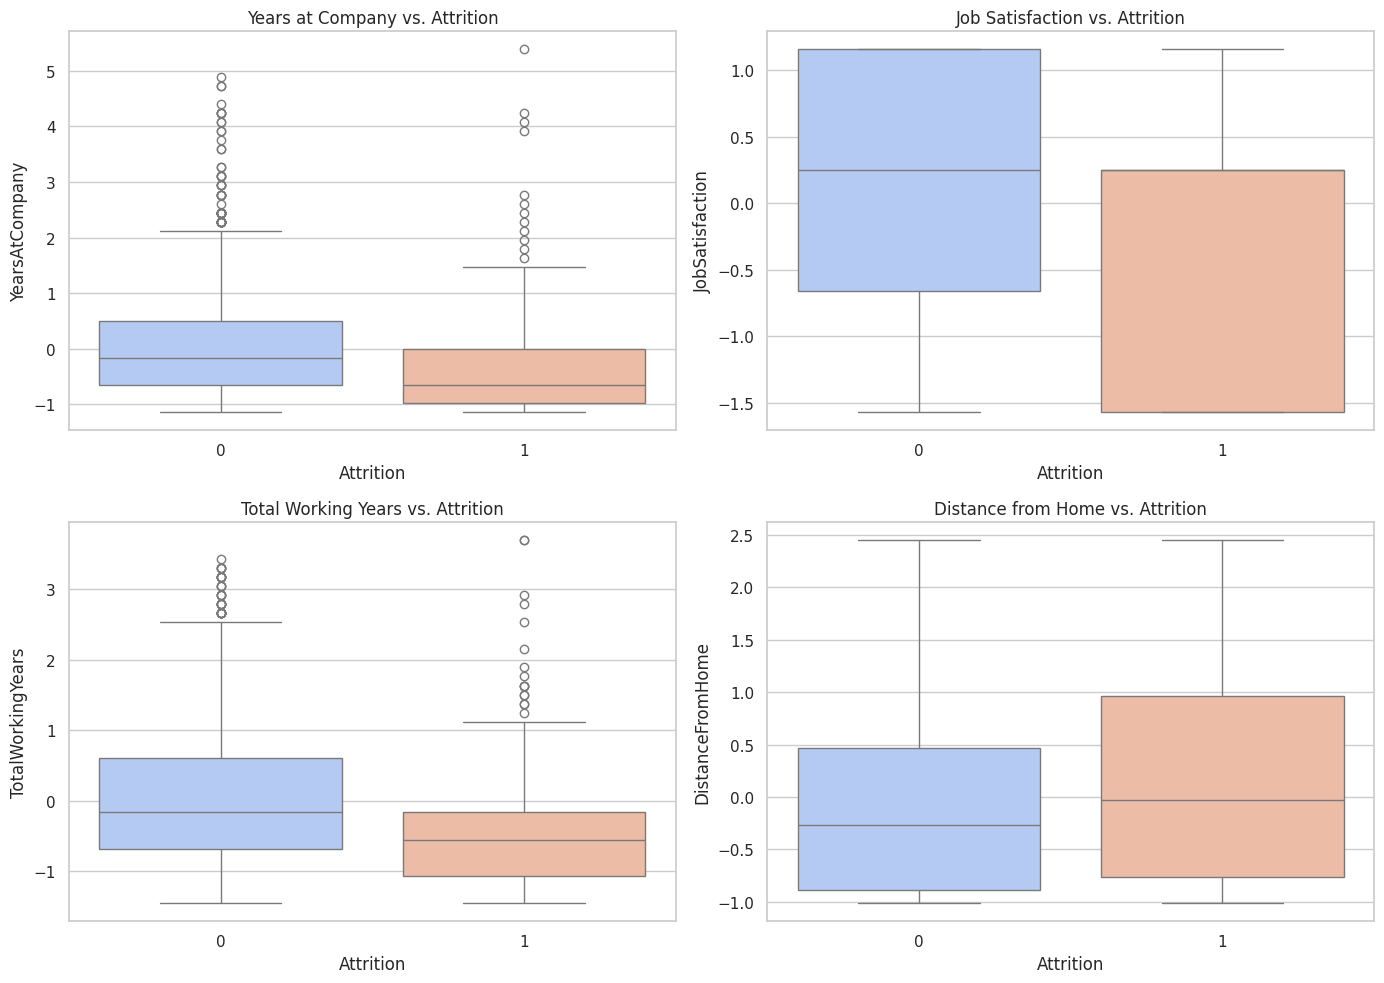

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = "/content/drive/MyDrive/Collab Datasets/HR_Employee_Attrition_dataset.csv"
df = pd.read_csv(file_path)

# Encode categorical variables
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Encode target variable Attrition (Yes -> 1, No -> 0)
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Attrition")
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Split into training and testing sets (80-20 split)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exploratory Data Analysis (EDA)
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x=df["Attrition"], palette="coolwarm")
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplots for key features affecting Attrition
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x=df["Attrition"], y=df["YearsAtCompany"], palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Years at Company vs. Attrition")
sns.boxplot(x=df["Attrition"], y=df["JobSatisfaction"], palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Job Satisfaction vs. Attrition")
sns.boxplot(x=df["Attrition"], y=df["TotalWorkingYears"], palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Total Working Years vs. Attrition")
sns.boxplot(x=df["Attrition"], y=df["DistanceFromHome"], palette="coolwarm", ax=axes[1, 1])
axes[1, 1].set_title("Distance from Home vs. Attrition")
plt.tight_layout()
plt.show()

#Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "/content/drive/MyDrive/Collab Datasets/HR_Employee_Attrition_dataset.csv"
df = pd.read_csv(file_path)

# Encode categorical variables using One-Hot Encoding
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target variable Attrition
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Identify & Drop Highly Correlated Features
def drop_highly_correlated_features(df, threshold=0.75):
    """
    Drops features that are highly correlated with each other.
    """
    # Select only numeric columns
    numerical_df = df.select_dtypes(include=["int64", "float64"])

    corr_matrix = numerical_df.corr()
    to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                to_drop.add(colname)

    print("Dropping highly correlated features:", to_drop)
    return df.drop(columns=to_drop)

df = drop_highly_correlated_features(df)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Attrition")
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Train-Test Split (80-20)
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display final dataset shape
print("Final dataset shape after feature selection:", X_train.shape)


Dropping highly correlated features: {'TotalWorkingYears', 'YearsInCurrentRole', 'MonthlyIncome', 'PerformanceRating', 'YearsWithCurrManager'}
Final dataset shape after feature selection: (1176, 39)




```


```

# Updates after feature engineering

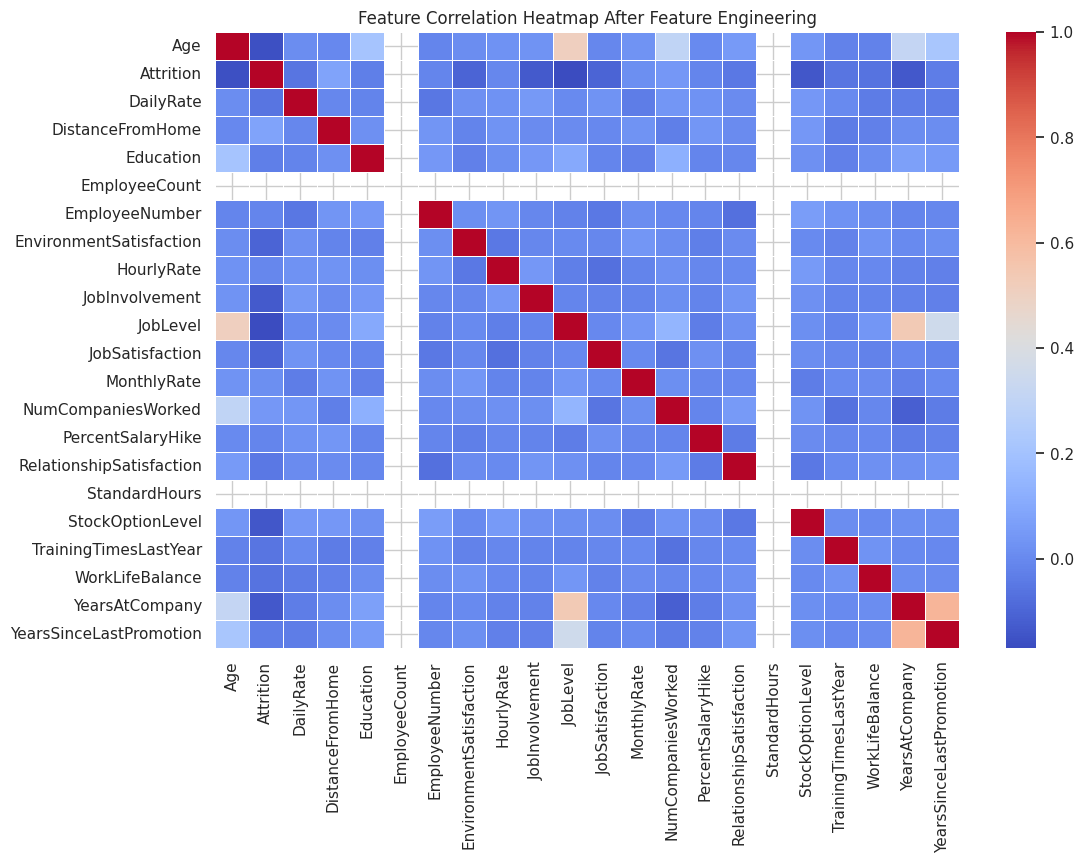

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix computation
numerical_df = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap After Feature Engineering")
plt.show()


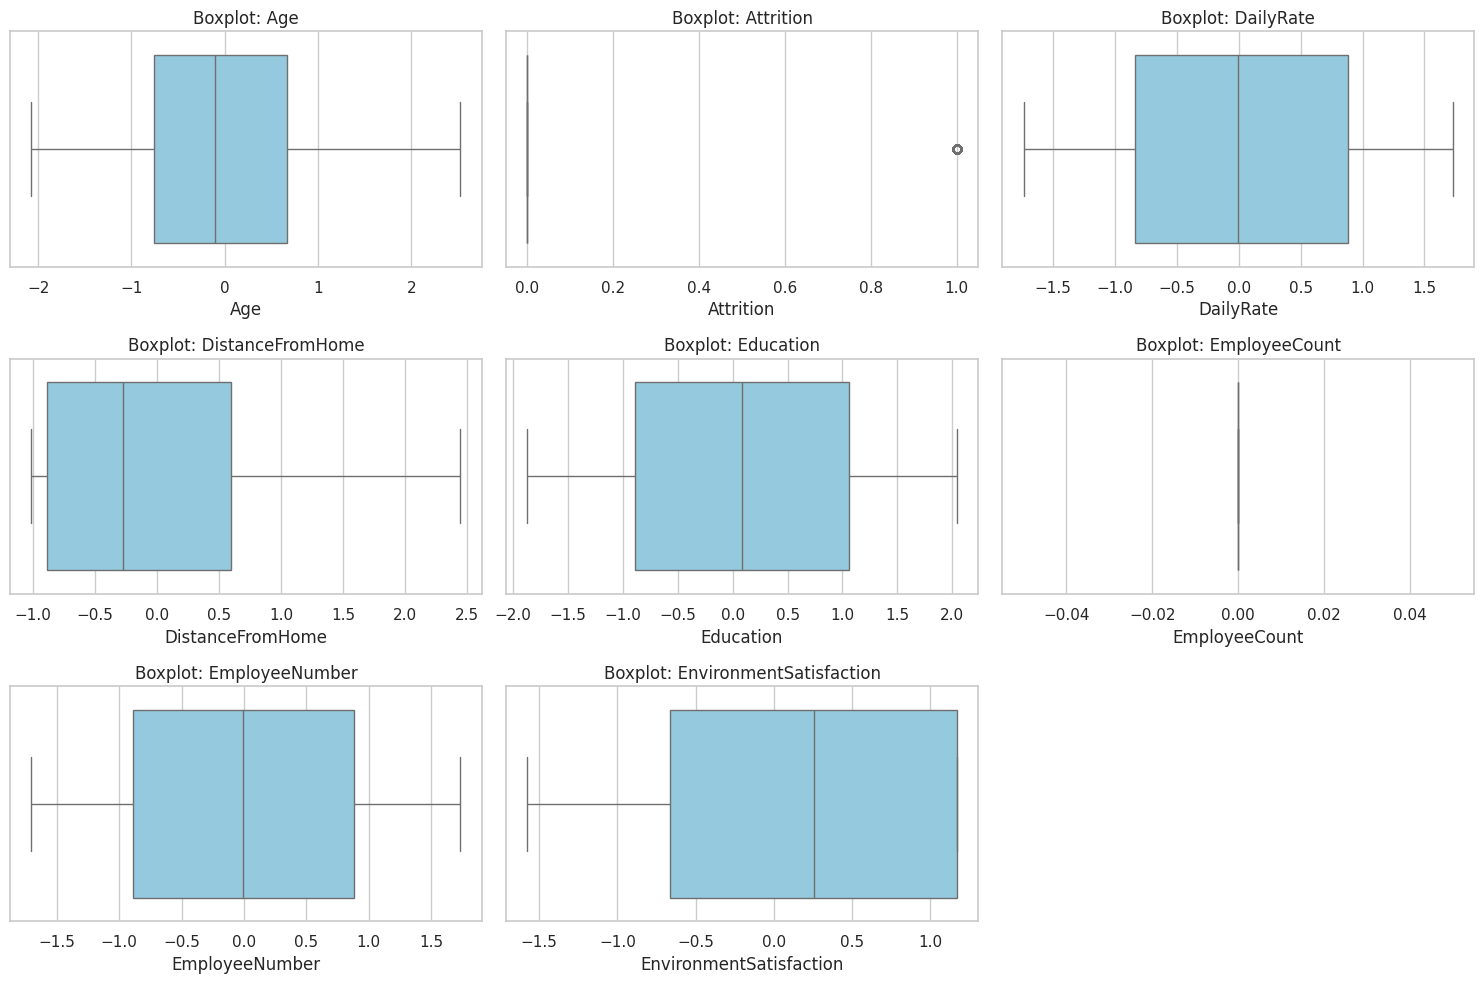

In [ ]:
import numpy as np

# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:8]):  # Plot first 8 numerical features
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot: {col}")

plt.tight_layout()
plt.show()


Columns in X before One-Hot Encoding: Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
Non-numeric columns after One-Hot Encoding: Index(['EducationField', 'Over18'], dtype='object')
Dropped non-numeric columns: Index(['EducationField', 'Over18'], dtype='object')
Columns in X after One-Hot Encoding and non-numeric column removal: Index(['Age', 'Dail

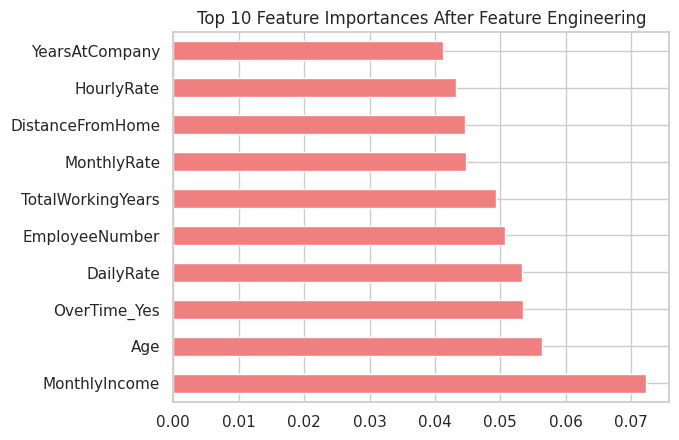

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/MyDrive/Collab Datasets/HR_Employee_Attrition_dataset.csv"
df = pd.read_csv(file_path)

# Separate features and target
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Check the columns in X before applying get_dummies
print("Columns in X before One-Hot Encoding:", X.columns)

# Define categorical columns that need to be One-Hot Encoded
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]

# Only apply pd.get_dummies if the columns are present in X
columns_in_X = [col for col in categorical_cols if col in X.columns]
if columns_in_X:
    X = pd.get_dummies(X, columns=columns_in_X, drop_first=True)
else:
    print(f"The following categorical columns are not present in X: {set(categorical_cols) - set(X.columns)}")

# Check for any remaining non-numeric columns
non_numeric_columns = X.select_dtypes(include=["object"]).columns
print(f"Non-numeric columns after One-Hot Encoding: {non_numeric_columns}")

# If there are non-numeric columns, they need to be dropped or converted
# Since the Random Forest model requires all features to be numeric, ensure this step is handled
if len(non_numeric_columns) > 0:
    X = X.drop(columns=non_numeric_columns)
    print(f"Dropped non-numeric columns: {non_numeric_columns}")

# Check that all columns in X are numeric now
print("Columns in X after One-Hot Encoding and non-numeric column removal:", X.columns)

# Train a basic model to check feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot top 10 feature importances
feat_importances.nlargest(10).plot(kind="barh", color="lightcoral")
plt.title("Top 10 Feature Importances After Feature Engineering")
plt.show()


# Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


Columns before scaling:
Age                                   int64
DailyRate                             int64
DistanceFromHome                      int64
Education                             int64
EducationField                       object
EmployeeCount                         int64
EmployeeNumber                        int64
EnvironmentSatisfaction               int64
HourlyRate                            int64
JobInvolvement                        int64
JobLevel                              int64
JobSatisfaction                       int64
MonthlyIncome                         int64
MonthlyRate                           int64
NumCompaniesWorked                    int64
Over18                               object
PercentSalaryHike                     int64
PerformanceRating                     int64
RelationshipSatisfaction              int64
StandardHours                         int64
StockOptionLevel                      int64
TotalWorkingYears                     int64
Training

/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


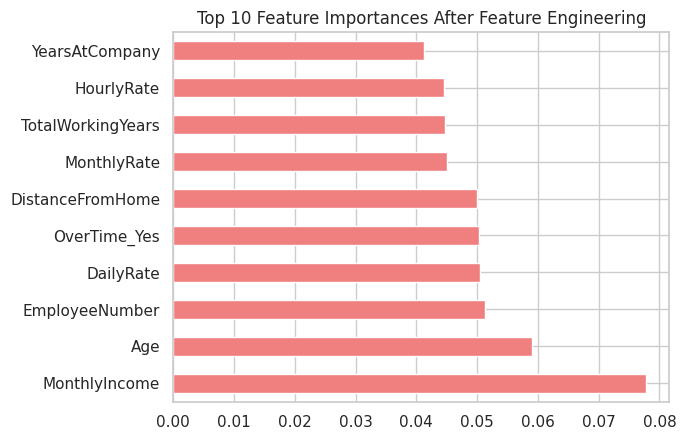

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/MyDrive/Collab Datasets/HR_Employee_Attrition_dataset.csv"
df = pd.read_csv(file_path)

# Encode categorical variables using One-Hot Encoding
categorical_cols = ["BusinessTravel", "Department", "Gender", "JobRole", "MaritalStatus", "OverTime"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target variable 'Attrition'
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Define features and target
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target variable

# Train-test split for the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check if there are still any non-numeric columns in X_train
print("Columns before scaling:")
print(X_train.dtypes)

# Ensure all columns are numeric (after encoding)
# You can manually convert all columns to numeric if needed:
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert all to numeric (if any strings remain)
X_test = X_test.apply(pd.to_numeric, errors='coerce')  # Same for test set

# Check if there are still any non-numeric columns
print("Columns after applying to_numeric:")
print(X_train.dtypes)

# Standardize numerical features for the original data
scaler = StandardScaler()

# Apply scaler only to numerical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Check that all columns are numeric after scaling
print("Columns after scaling:")
print(X_train.dtypes)

# Train a basic model to check feature importance (using original train-test split data)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance scores for the model
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh", color="lightcoral")
plt.title("Top 10 Feature Importances After Feature Engineering")
plt.show()


# Logistic Regression



without smote

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assume df is your pre-processed DataFrame, where 'Attrition' is the target variable

# Separate features and target
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define column names
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Build a column transformer with different strategies for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numerical features
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value for categorical features
            ('onehot', OneHotEncoder(drop='first'))  # Apply OneHotEncoding
        ]), categorical_cols)
    ])

# Create a pipeline with the preprocessor and logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_log = model_pipeline.predict(X_test)

# Calculate accuracy
log_acc = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8503
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       247
           1       0.67      0.13      0.21        47

    accuracy                           0.85       294
   macro avg       0.76      0.56      0.57       294
weighted avg       0.83      0.85      0.80       294



<Axes: >

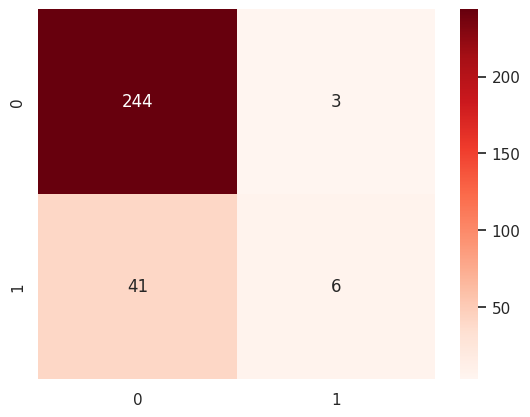

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Reds")

with smote

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assume df is your pre-processed DataFrame, where 'Attrition' is the target variable

# Separate features and target
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define column names
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Build a column transformer with different strategies for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean for numerical features
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value for categorical features
            ('onehot', OneHotEncoder(drop='first'))  # Apply OneHotEncoding
        ]), categorical_cols)
    ])

# Apply the preprocessing pipeline on training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE for oversampling the minority class on the numerical data only (after preprocessing)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_preprocessed, y_train)

# Create a logistic regression model
log_model = LogisticRegression(max_iter=1000)

# Train the model on resampled data
log_model.fit(X_res, y_res)

# Make predictions
y_pred_log = log_model.predict(X_test_preprocessed)

# Calculate accuracy
log_acc_1 = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy after SMOTE: {log_acc_1:.4f}")
print(classification_report(y_test, y_pred_log))




Logistic Regression Accuracy after SMOTE: 0.7211
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       247
           1       0.32      0.68      0.44        47

    accuracy                           0.72       294
   macro avg       0.62      0.70      0.63       294
weighted avg       0.83      0.72      0.75       294



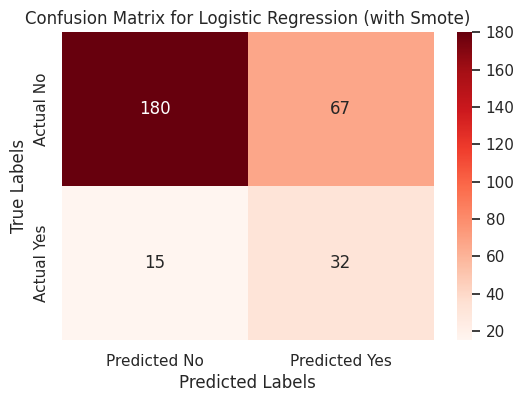

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Logistic Regression (with Smote)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Decision Tree Classifier



without smote

In [ ]:
def draw_c_matrix(y_test, y_pred):
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Reds")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into features and target
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target variable

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numeric_features),  # Handle missing numeric data
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing categorical data
            ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
        ]), categorical_features)
    ])

# Create a pipeline with preprocessor and Decision Tree model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("scaler", StandardScaler()),  # Apply scaling after encoding
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_pipeline.predict(X_test)

# Evaluate the model using accuracy
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

# Print classification report
print(classification_report(y_test, y_pred_dt))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)



Decision Tree Accuracy: 0.7857
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       247
           1       0.33      0.32      0.32        47

    accuracy                           0.79       294
   macro avg       0.60      0.60      0.60       294
weighted avg       0.78      0.79      0.78       294



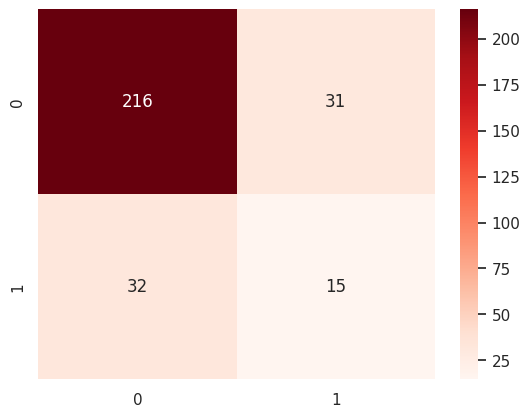

In [ ]:
draw_c_matrix(y_test, y_pred_dt)

with smote

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into features and target
X = df.drop(columns=["Attrition"])  # Features
y = df["Attrition"]  # Target variable

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define preprocessing steps
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Create a preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numeric_features),  # Handle missing numeric data
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),  # Handle missing categorical data
            ("encoder", OneHotEncoder(handle_unknown="ignore"))  # One-hot encode categorical features
        ]), categorical_features)
    ])

# Apply preprocessing to the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Create a pipeline with preprocessor and Decision Tree model
model_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),  # Apply scaling after preprocessing
    ("classifier", DecisionTreeClassifier(random_state=42))  # Train Decision Tree model
])

# Train the model with resampled data (SMOTE applied)
model_pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred_dt = model_pipeline.predict(X_test_preprocessed)

# Evaluate the model using accuracy
dt_acc_1 = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy with SMOTE: {dt_acc_1:.4f}")

# Print classification report
print(classification_report(y_test, y_pred_dt))




Decision Tree Accuracy with SMOTE: 0.7517
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       247
           1       0.24      0.26      0.25        47

    accuracy                           0.75       294
   macro avg       0.55      0.55      0.55       294
weighted avg       0.76      0.75      0.75       294



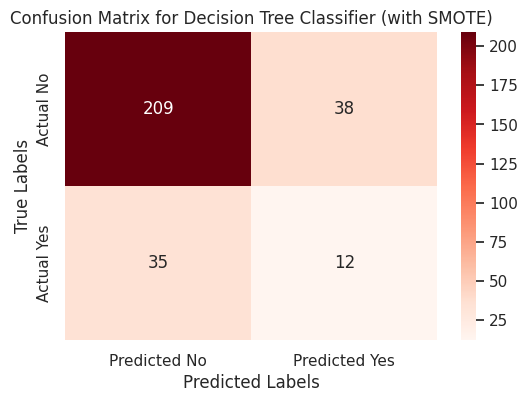

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Decision Tree Classifier (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# Random Forest Classifier

without smote

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare features and target
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

# Step 2: One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, stratify=y, random_state=42)

# Step 4: Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Step 7: Evaluate
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy without SMOTE: {rf_acc:.4f}\n")
print(classification_report(y_test, y_pred_rf))





Random Forest Accuracy without SMOTE: 0.8639

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       247
           1       1.00      0.15      0.26        47

    accuracy                           0.86       294
   macro avg       0.93      0.57      0.59       294
weighted avg       0.88      0.86      0.82       294



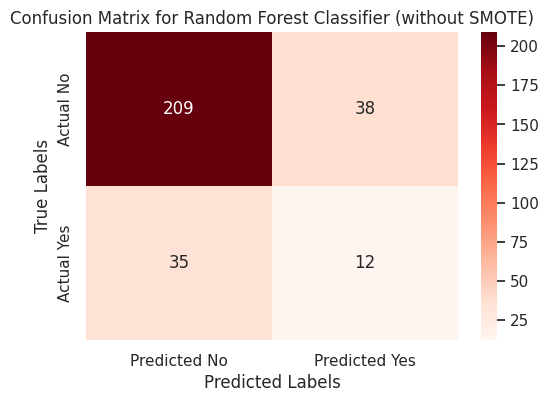

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Random Forest Classifier (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



with smote

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Step 1: Define features and target
target_column = 'Attrition'  # Target is Attrition
X = df.drop(target_column, axis=1)
y = df[target_column]

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: Preprocess categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Define transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Apply scaling to numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical columns
    ])

# Step 4: Apply SMOTE and train the model
smote = SMOTE(random_state=42)

# Create a pipeline: first, apply preprocessing, then SMOTE, and finally Random Forest
model_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('smote', smote),                # Apply SMOTE
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest
])

# Step 5: Train the model with the pipeline
model_pipeline.fit(X_train, y_train)

# Step 6: Make predictions
y_pred_rf = model_pipeline.predict(X_test)

# Step 7: Evaluate performance
rf_acc_1 = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy with SMOTE: {rf_acc_1:.4f}")
print(classification_report(y_test, y_pred_rf))



Random Forest Accuracy with SMOTE: 0.8844
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       247
           1       0.84      0.34      0.48        47

    accuracy                           0.88       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.88      0.88      0.86       294



In [ ]:
print(df.columns)


Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Repre

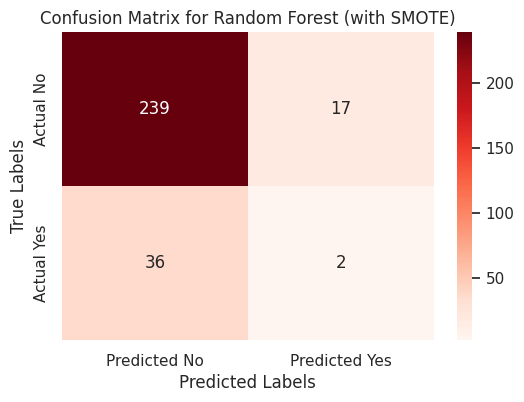

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_rf are already defined:
# y_test - True labels
# y_pred_rf - Predicted labels from Random Forest model

# Step 1: Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Step 2: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])

# Step 3: Add labels and title
plt.title("Confusion Matrix for Random Forest (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# Step 4: Show the plot
plt.show()


# Support Vector Machine (SVM)



without smote

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical columns (replace with your column names if necessary)
# Assuming 'X_train' has some categorical columns like 'Medical'
# First, encode categorical columns into numeric values using LabelEncoder or OneHotEncoder

# If you have specific categorical columns, you can use LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()

# Example: encoding 'Medical' column if it's categorical (replace with your column name)
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Assuming X_train is a dataframe, you can use pd.get_dummies to encode all categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 1: Standardize the features (scale them to have a mean of 0 and standard deviation of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 2: Train an SVM classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 3: Predict the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 4: Calculate accuracy
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc:.4f}")

# Step 5: Print the classification report
print(classification_report(y_test, y_pred_svm))

# Step 6: Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)



SVM Accuracy: 0.8707
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       247
           1       0.91      0.21      0.34        47

    accuracy                           0.87       294
   macro avg       0.89      0.60      0.64       294
weighted avg       0.88      0.87      0.84       294



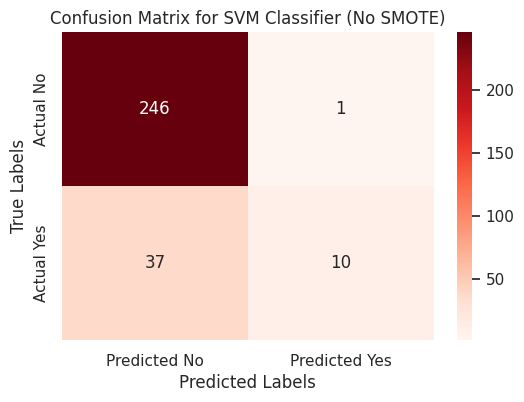

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for SVM Classifier (No SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


with smote

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Encode categorical columns (replace with your column names if necessary)
# Assuming 'X_train' has some categorical columns like 'Medical'
# First, encode categorical columns into numeric values using LabelEncoder or OneHotEncoder

# If you have specific categorical columns, you can use LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()

# Example: encoding 'Medical' column if it's categorical (replace with your column name)
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Assuming X_train is a dataframe, you can use pd.get_dummies to encode all categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 1: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train_encoded, y_train)

# Step 2: Standardize the features (scale them to have a mean of 0 and standard deviation of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_s)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 3: Train an SVM classifier with the resampled data
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train_s)

# Step 4: Predict the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 5: Calculate accuracy
svm_acc_1 = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy with SMOTE: {svm_acc_1:.4f}")

# Step 6: Print the classification report
print(classification_report(y_test, y_pred_svm))

# Step 7: Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)




SVM Accuracy with SMOTE: 0.8707
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.74      0.30      0.42        47

    accuracy                           0.87       294
   macro avg       0.81      0.64      0.68       294
weighted avg       0.86      0.87      0.85       294



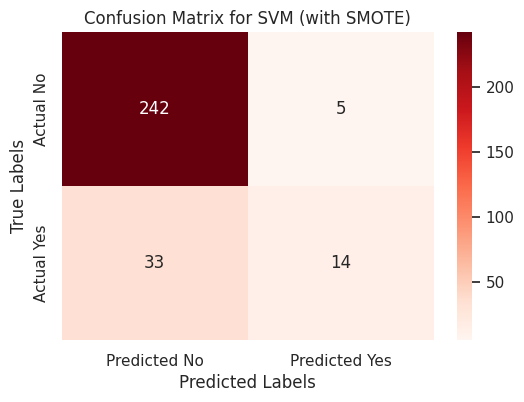

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for SVM (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# K-Nearest Neighbors (KNN)



without smote

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns (replace with your column names if necessary)
# Assuming 'X_train' has some categorical columns like 'Medical'
# First, encode categorical columns into numeric values using LabelEncoder or OneHotEncoder

# If you have specific categorical columns, you can use LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()

# Example: encoding 'Medical' column if it's categorical (replace with your column name)
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Assuming X_train is a dataframe, you can use pd.get_dummies to encode all categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Standardize the features (scale them to have a mean of 0 and standard deviation of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 3: Train a KNN classifier (with k=5 as an example)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Step 4: Predict the test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Step 5: Calculate accuracy
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy without SMOTE: {knn_acc:.4f}")

# Step 6: Print the classification report
print(classification_report(y_test, y_pred_knn))

# Step 7: Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Step 8: Plot the confusion matrix




KNN Accuracy without SMOTE: 0.8367
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.47      0.17      0.25        47

    accuracy                           0.84       294
   macro avg       0.66      0.57      0.58       294
weighted avg       0.80      0.84      0.80       294



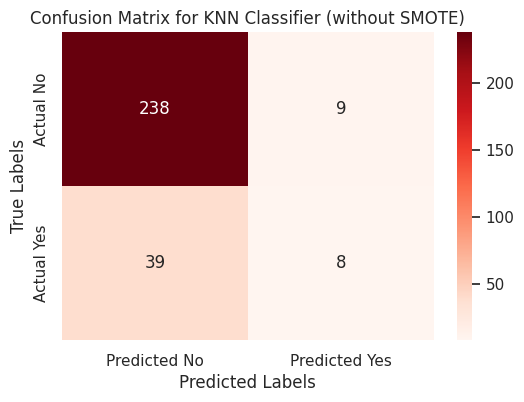

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for KNN Classifier (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with smote

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns (if necessary)
# Example: encoding a 'Medical' column if it's categorical (replace with your column name)
# label_encoder = LabelEncoder()
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Example: encoding all categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Apply SMOTE to balance the dataset (oversample the minority class)
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train_encoded, y_train)

# Step 3: Standardize the features (scale them to have a mean of 0 and std of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_s)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 4: Train a KNN classifier (using k=5 as an example)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train_s)

# Step 5: Predict on the test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Step 6: Calculate accuracy
knn_acc_1 = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy with SMOTE: {knn_acc_1:.4f}")

# Step 7: Print the classification report
print(classification_report(y_test, y_pred_knn))

# Step 8: Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Step 9: Plot the confusion matrix



KNN Accuracy with SMOTE: 0.7415
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       247
           1       0.25      0.32      0.28        47

    accuracy                           0.74       294
   macro avg       0.56      0.57      0.56       294
weighted avg       0.77      0.74      0.75       294



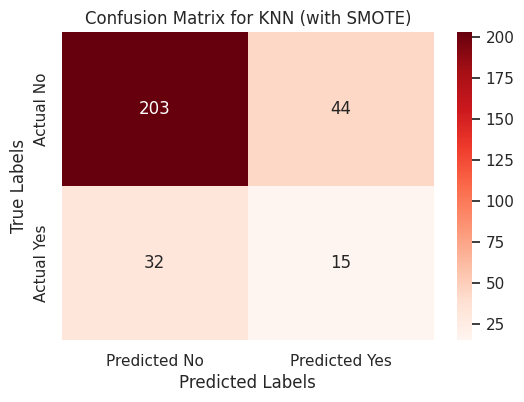

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for KNN (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Naive Bayes

without smote

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns (if necessary)
# Example: encoding a 'Medical' column if it's categorical (replace with your column name)
# label_encoder = LabelEncoder()
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Example: encoding all categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Standardize the features (scale them to have a mean of 0 and std of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 3: Train a Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Step 4: Predict on the test data
y_pred_nb = nb_model.predict(X_test_scaled)

# Step 5: Calculate accuracy
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_acc:.4f}")

# Step 6: Print the classification report
print(classification_report(y_test, y_pred_nb))

# Step 7: Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Step 8: Plot the confusion matrix



Naive Bayes Accuracy: 0.7075
              precision    recall  f1-score   support

           0       0.97      0.68      0.80       247
           1       0.34      0.87      0.49        47

    accuracy                           0.71       294
   macro avg       0.65      0.77      0.64       294
weighted avg       0.87      0.71      0.75       294



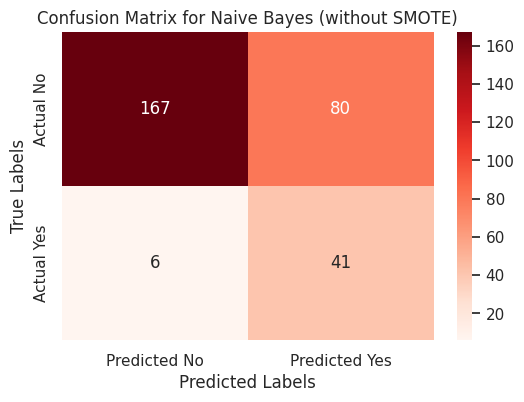

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Naive Bayes (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with smote

Naive Bayes Accuracy with SMOTE: 0.5544
              precision    recall  f1-score   support

           0       0.95      0.49      0.65       247
           1       0.25      0.87      0.38        47

    accuracy                           0.55       294
   macro avg       0.60      0.68      0.52       294
weighted avg       0.84      0.55      0.61       294



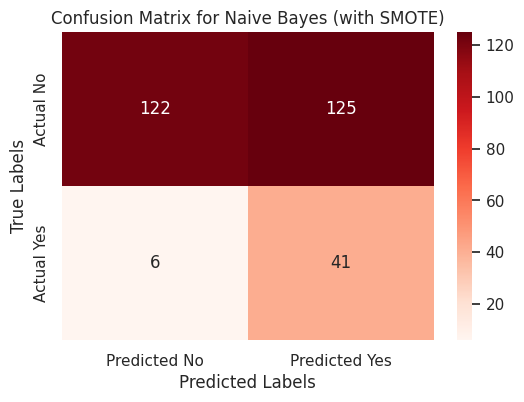

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns (if necessary)
# Example: encoding a 'Medical' column if it's categorical (replace with your column name)
# label_encoder = LabelEncoder()
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Example: encoding all categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Standardize the features (scale them to have a mean of 0 and std of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 3: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 4: Train a Naive Bayes classifier on the resampled data
nb_model_smote = GaussianNB()
nb_model_smote.fit(X_train_resampled, y_train_resampled)

# Step 5: Predict on the test data
y_pred_nb_smote = nb_model_smote.predict(X_test_scaled)

# Step 6: Calculate accuracy
nb_acc_1 = accuracy_score(y_test, y_pred_nb_smote)
print(f"Naive Bayes Accuracy with SMOTE: {nb_acc_1:.4f}")

# Step 7: Print the classification report
print(classification_report(y_test, y_pred_nb_smote))

# Step 8: Compute confusion matrix
cm_nb_smote = confusion_matrix(y_test, y_pred_nb_smote)

# Step 9: Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb_smote, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Naive Bayes (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



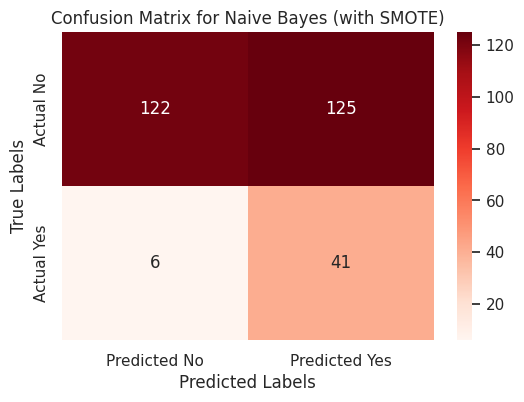

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb_smote, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Naive Bayes (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


#Gradient Boosting

without smote

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns (if necessary)
# If there are categorical columns, encode them (this is just an example, adjust it according to your dataset)
# label_encoder = LabelEncoder()
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Example: encoding all categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Standardize the features (scale them to have a mean of 0 and std of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 3: Train Gradient Boosting Classifier without SMOTE
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Step 4: Predict on test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Step 5: Calculate accuracy
gb_acc = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy (without SMOTE): {gb_acc:.4f}")

# Step 6: Print the classification report
print(classification_report(y_test, y_pred_gb))

# Step 7: Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Step 8: Plot the confusion matrix



Gradient Boosting Accuracy (without SMOTE): 0.8639
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.73      0.23      0.35        47

    accuracy                           0.86       294
   macro avg       0.80      0.61      0.64       294
weighted avg       0.85      0.86      0.83       294



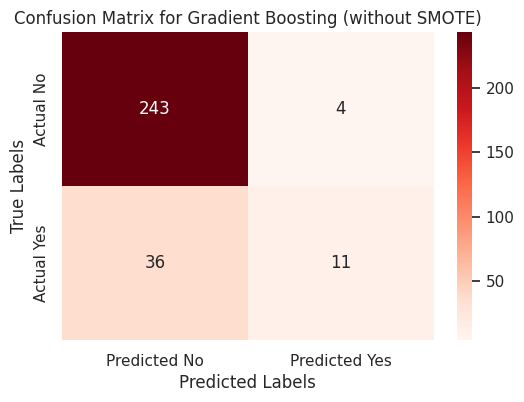

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Gradient Boosting (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with smote

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns (if necessary)
# If there are categorical columns, encode them (this is just an example, adjust it according to your dataset)
# label_encoder = LabelEncoder()
# X_train['Medical'] = label_encoder.fit_transform(X_train['Medical'])
# X_test['Medical'] = label_encoder.transform(X_test['Medical'])

# Or apply OneHotEncoding to all categorical columns
# Example: encoding all categorical columns
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Standardize the features (scale them to have a mean of 0 and std of 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Step 3: Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train_scaled, y_train)

# Step 4: Train Gradient Boosting Classifier with SMOTE
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_s, y_train_s)

# Step 5: Predict on test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Step 6: Calculate accuracy
gb_acc_1 = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy (with SMOTE): {gb_acc_1:.4f}")

# Step 7: Print the classification report
print(classification_report(y_test, y_pred_gb))

# Step 8: Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Step 9: Plot the confusion matrix


Gradient Boosting Accuracy (with SMOTE): 0.8844
              precision    recall  f1-score   support

           0       0.89      0.99      0.93       247
           1       0.84      0.34      0.48        47

    accuracy                           0.88       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.88      0.88      0.86       294



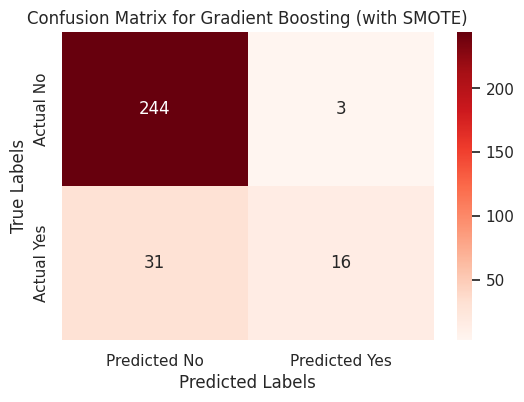

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Gradient Boosting (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# AdaBoost Classifier

without smote

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame and 'target' is the target column

# Step 1: Separate features and target variable
X = df.drop('Attrition', axis=1)  # Change 'Attrition' to your actual target column name
y = df['Attrition']  # Change 'Attrition' to your actual target column name

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply preprocessing to handle categorical variables and scale numerical ones
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Create a pipeline with preprocessing and AdaBoost model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=50, random_state=42))
])

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Predict on the test data
y_pred_ada = model.predict(X_test)

# Step 7: Calculate accuracy
ada_acc = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy (without SMOTE): {ada_acc:.4f}")

# Step 8: Print classification report
print(classification_report(y_test, y_pred_ada))

# Step 9: Compute confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Step 10: Plot the confusion matrix



AdaBoost Accuracy (without SMOTE): 0.8537
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       256
           1       0.33      0.13      0.19        38

    accuracy                           0.85       294
   macro avg       0.61      0.55      0.55       294
weighted avg       0.81      0.85      0.83       294



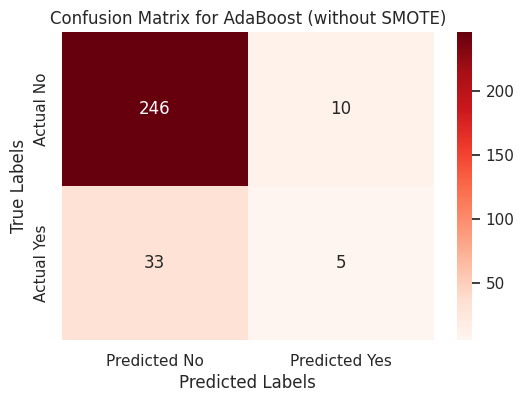

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for AdaBoost (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with smote

In [ ]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Assuming df is your original DataFrame and 'Attrition' is the target column

# Separate features and target variable
X = df.drop('Attrition', axis=1)  # Replace 'Attrition' with your actual target column name
y = df['Attrition']  # Replace 'Attrition' with your actual target column name

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply preprocessing to handle categorical variables and scale numerical ones
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Step 5: Apply SMOTE to the processed training data (which is now a numpy.ndarray)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Step 6: Create a pipeline with preprocessing and AdaBoost model
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Step 7: Train the model with resampled data
model.fit(X_train_resampled, y_train_resampled)

# Step 8: Predict on the test data
X_test_processed = preprocessor.transform(X_test)
y_pred_ada_smote = model.predict(X_test_processed)

# Step 9: Calculate accuracy
ada_acc_1 = accuracy_score(y_test, y_pred_ada_smote)
print(f"AdaBoost Accuracy (with SMOTE): {ada_acc_1:.4f}")

# Step 10: Print classification report
print(classification_report(y_test, y_pred_ada_smote))

# Step 11: Compute confusion matrix
cm_ada_smote = confusion_matrix(y_test, y_pred_ada_smote)

# Step 12: Plot the confusion matrix



AdaBoost Accuracy (with SMOTE): 0.8061
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       256
           1       0.27      0.29      0.28        38

    accuracy                           0.81       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.81      0.81      0.81       294



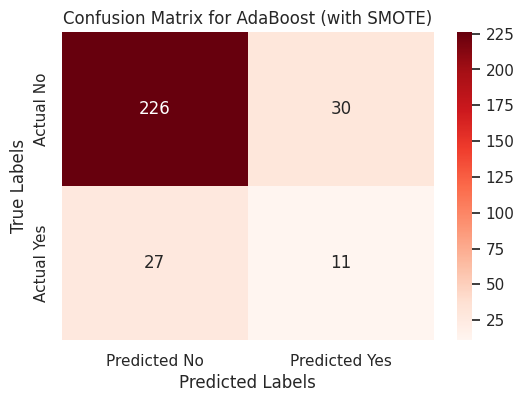

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada_smote, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for AdaBoost (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#XGBoost

without smote

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Assuming df is your original DataFrame and 'Attrition' is the target column

# Separate features and target variable
X = df.drop('Attrition', axis=1)  # Replace 'Attrition' with your actual target column name
y = df['Attrition']  # Replace 'Attrition' with your actual target column name

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply preprocessing to handle categorical variables and scale numerical ones
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 5: Create and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 6: Train the model with training data
xgb_model.fit(X_train_processed, y_train)

# Step 7: Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_processed)

# Step 8: Calculate accuracy
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy (without SMOTE): {xgb_acc:.4f}")

# Step 9: Print classification report
print(classification_report(y_test, y_pred_xgb))

# Step 10: Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Step 11: Plot the confusion matrix




/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy (without SMOTE): 0.8537
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       256
           1       0.38      0.21      0.27        38

    accuracy                           0.85       294
   macro avg       0.64      0.58      0.59       294
weighted avg       0.82      0.85      0.84       294



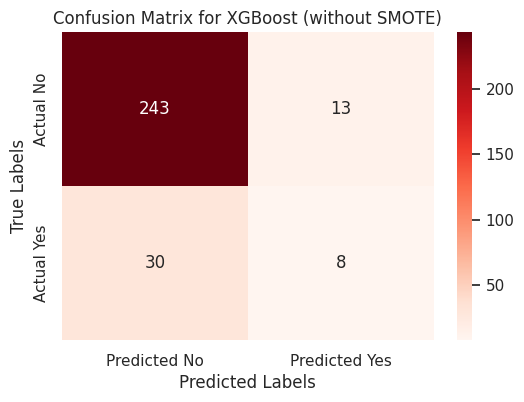

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for XGBoost (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with smote

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Assuming df is your original DataFrame and 'Attrition' is the target column

# Separate features and target variable
X = df.drop('Attrition', axis=1)  # Replace 'Attrition' with your actual target column name
y = df['Attrition']  # Replace 'Attrition' with your actual target column name

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply preprocessing to handle categorical variables and scale numerical ones
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 5: Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Step 6: Create and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 7: Train the model with the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Step 8: Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_processed)

# Step 9: Calculate accuracy
xgb_acc_1 = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy (with SMOTE): {xgb_acc_1:.4f}")

# Step 10: Print classification report
print(classification_report(y_test, y_pred_xgb))

# Step 11: Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Step 12: Plot the confusion matrix



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:07:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy (with SMOTE): 0.8435
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       256
           1       0.33      0.21      0.26        38

    accuracy                           0.84       294
   macro avg       0.61      0.57      0.59       294
weighted avg       0.82      0.84      0.83       294



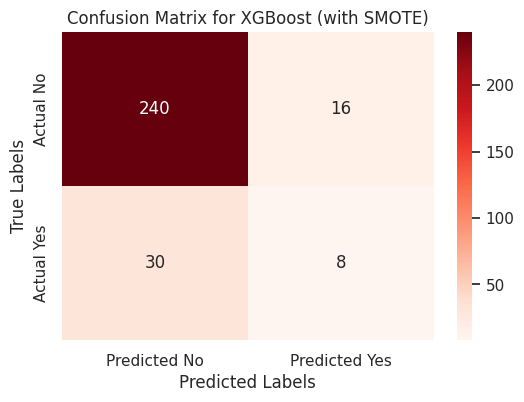

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for XGBoost (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#LightGBM

without smote

In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Assuming df is your original DataFrame and 'Attrition' is the target column

# Separate features and target variable
X = df.drop('Attrition', axis=1)  # Replace 'Attrition' with your actual target column name
y = df['Attrition']  # Replace 'Attrition' with your actual target column name

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply preprocessing to handle categorical variables and scale numerical ones
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 5: Create and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Step 6: Train the model with the original training data
lgb_model.fit(X_train_processed, y_train)

# Step 7: Predict on the test data
y_pred_lgb = lgb_model.predict(X_test_processed)

# Step 8: Calculate accuracy
lgb_acc = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy (without SMOTE): {lgb_acc:.4f}")

# Step 9: Print classification report
print(classification_report(y_test, y_pred_lgb))

# Step 10: Compute confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Step 11: Plot the confusion matrix




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 199, number of negative: 977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169218 -> initscore=-1.591182
[LightGBM] [Info] Start training from score -1.591182
LightGBM Accuracy (without SMOTE): 0.8469
              precision    recall  f1-score   support

           0       0.89      0.95      0.91       256
           1       0.33      0.18      0.24        38

    accuracy                           0.85       294
   macro avg       0.61      0.56      0.58       294
weighted avg       0.81      0.85      0.83       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


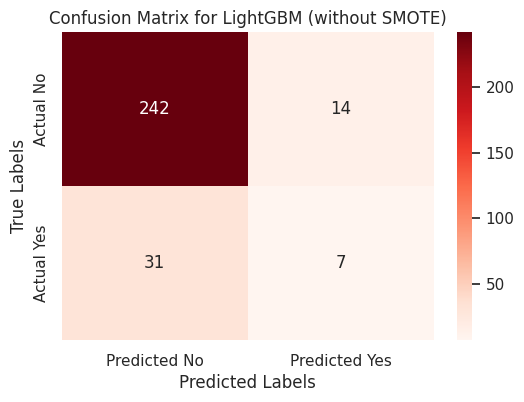

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for LightGBM (without SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

with smote

In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Step 1: Assuming df is your original DataFrame and 'Attrition' is the target column

# Separate features and target variable
X = df.drop('Attrition', axis=1)  # Replace 'Attrition' with your actual target column name
y = df['Attrition']  # Replace 'Attrition' with your actual target column name

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply preprocessing to handle categorical variables and scale numerical ones
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()

# Preprocessing pipeline for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 4: Apply preprocessing to the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Step 5: Apply SMOTE to the training data (oversampling minority class)
smote = SMOTE(random_state=42)
X_train_s, y_train_s = smote.fit_resample(X_train_processed, y_train)

# Step 6: Create and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Step 7: Train the model with the resampled data
lgb_model.fit(X_train_s, y_train_s)

# Step 8: Predict on the test data
y_pred_lgb = lgb_model.predict(X_test_processed)

# Step 9: Calculate accuracy
lgb_acc_1 = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy (with SMOTE): {lgb_acc_1:.4f}")

# Step 10: Print classification report
print(classification_report(y_test, y_pred_lgb))

# Step 11: Compute confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Step 12: Plot the confusion matrix



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 977, number of negative: 977
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6133
[LightGBM] [Info] Number of data points in the train set: 1954, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Accuracy (with SMOTE): 0.8367
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       256
           1       0.29      0.18      0.23        38

    accuracy                           0.84       294
   macro avg       0.59      0.56      0.57       294
weighted avg       0.81      0.84      0.82       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


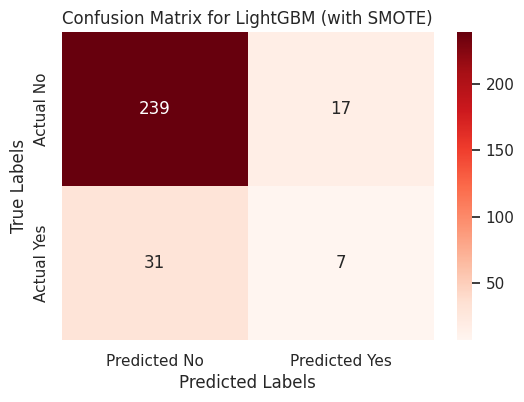

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Reds", xticklabels=["Predicted No", "Predicted Yes"], yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for LightGBM (with SMOTE)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Compare Model Performance

without smote

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 199, number of negative: 977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1383
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.169218 -> initscore=-1.591182
[LightGBM] [Info] Start training from score -1.591182


<ipython-input-63-eb18245f1d99>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in sorted_results], y=[x[1] for x in sorted_results], palette="coolwarm")


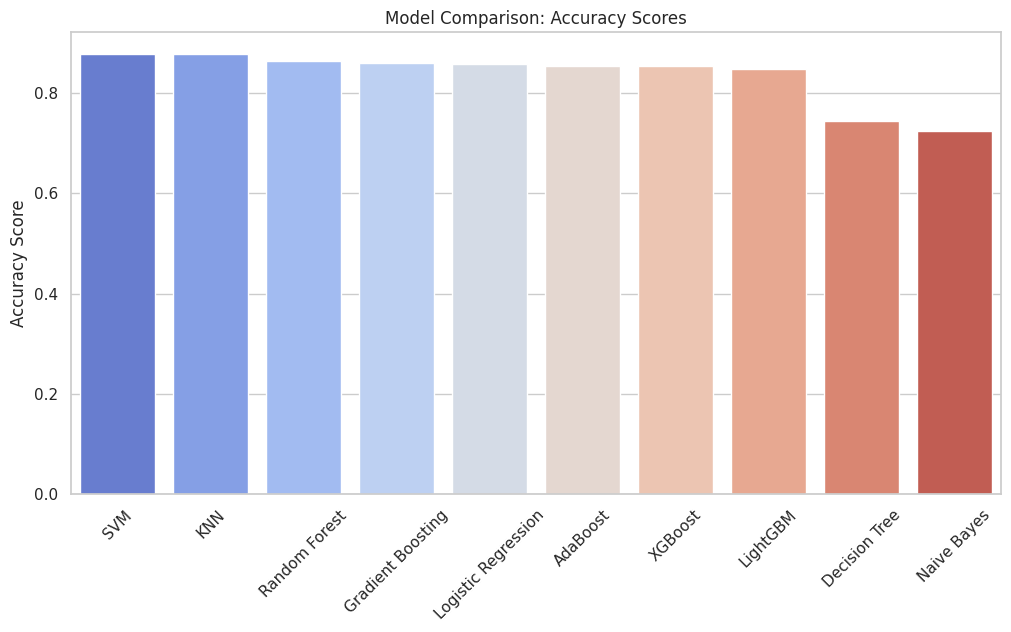

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

# Assume df is your full dataset and 'Attrition' is your target column
X = df.drop('Attrition', axis=1)  # Replace 'Attrition' with your actual target column name
y = df['Attrition']  # Replace 'Attrition' with your actual target column name

# Step 1: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Preprocess the features (standardization for numerical and one-hot encoding for categorical)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 3: Define and train models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42)
}

model_results = {}

# Step 4: Train and evaluate each model
for model_name, model in models.items():
    # Create a pipeline for each model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', model)])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)

    # Store the results
    model_results[model_name] = acc

# Step 5: Sort models by accuracy
sorted_results = sorted(model_results.items(), key=lambda x: x[1], reverse=True)

# Step 6: Plot accuracy scores
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in sorted_results], y=[x[1] for x in sorted_results], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Accuracy Scores")
plt.show()



In [ ]:
# # Assuming your model accuracy results are already stored in model_results dictionary
model_results = {
    "Logistic Regression": log_acc,  # Accuracy for Logistic Regression
    "Decision Tree": dt_acc,        # Accuracy for Decision Tree
    "Random Forest": rf_acc,        # Accuracy for Random Forest
    "SVM": svm_acc,                 # Accuracy for SVM
    "KNN": knn_acc,                 # Accuracy for KNN
    "Naive Bayes": nb_acc,          # Accuracy for Naive Bayes
    "Gradient Boosting": gb_acc,    # Accuracy for Gradient Boosting
    "AdaBoost": ada_acc,            # Accuracy for AdaBoost
    "XGBoost": xgb_acc,             # Accuracy for XGBoost
    "LightGBM": lgb_acc            # Accuracy for LightGBM
}

# Find the best model based on the highest accuracy
best_model_name = max(model_results, key=model_results.get)
best_model_accuracy = model_results[best_model_name]

# Print the best model and its accuracy
print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")




Best Model: SVM with Accuracy: 0.8707


with smote

<ipython-input-76-d0e4027c4799>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in sorted_results_smote], y=[x[1] for x in sorted_results_smote], palette="coolwarm")


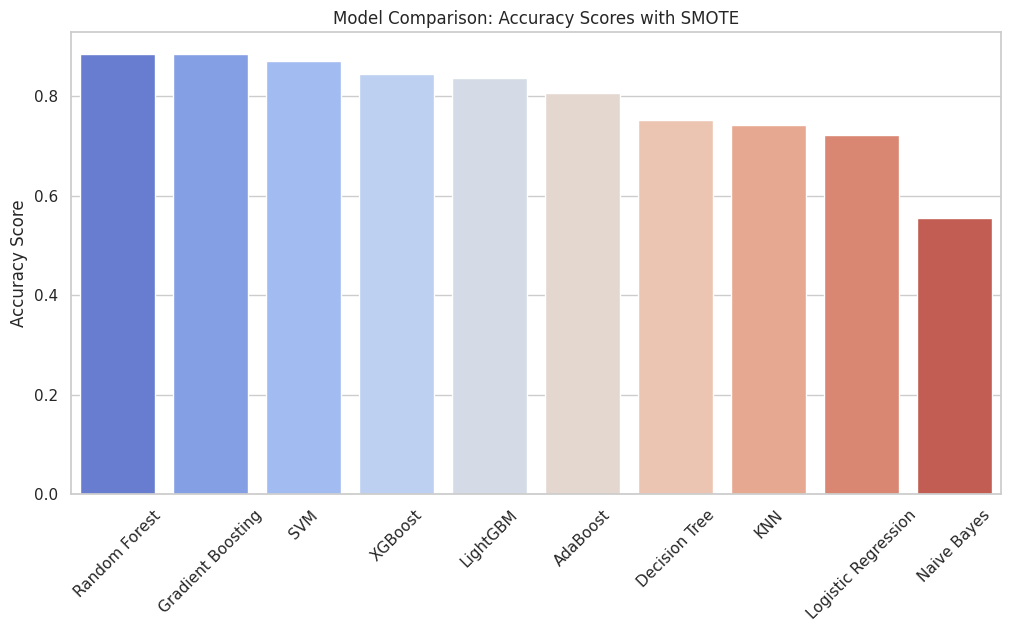

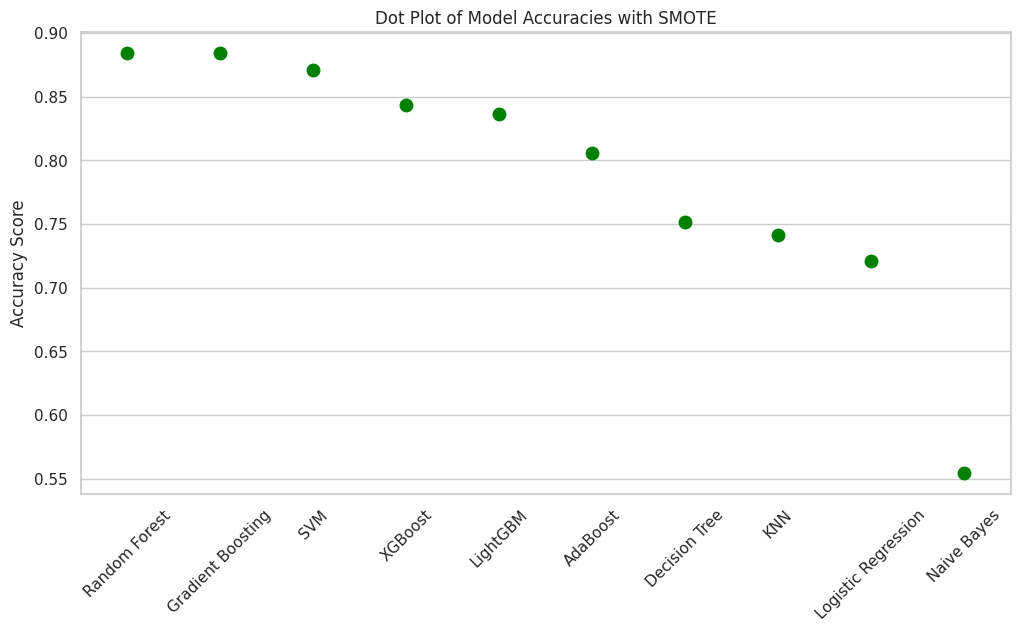

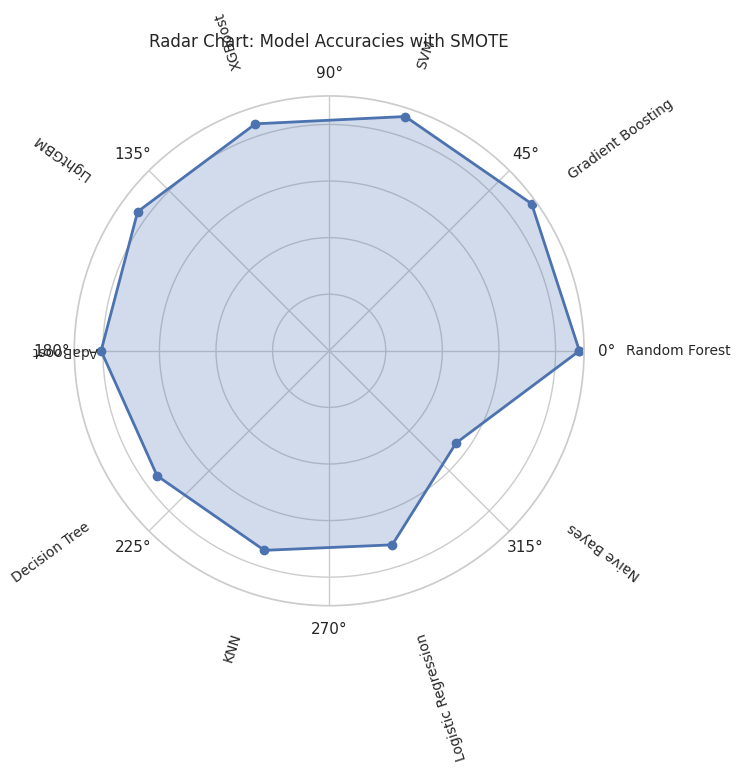

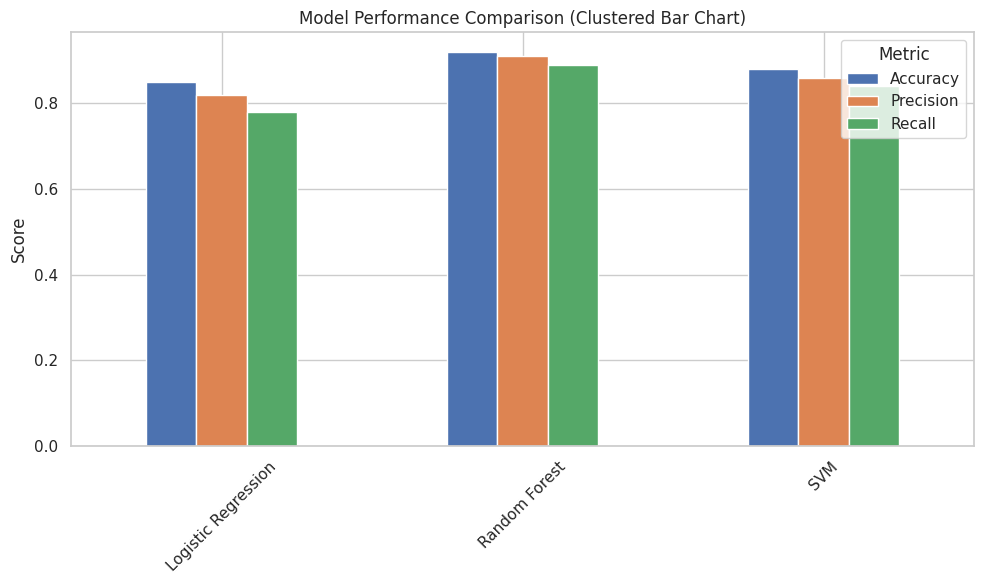

<ipython-input-76-d0e4027c4799>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=models, palette="viridis")


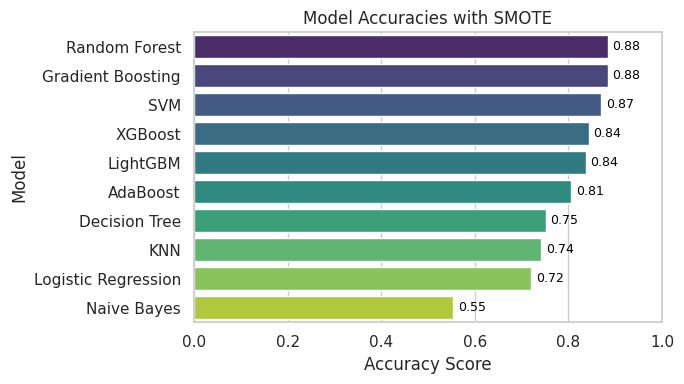

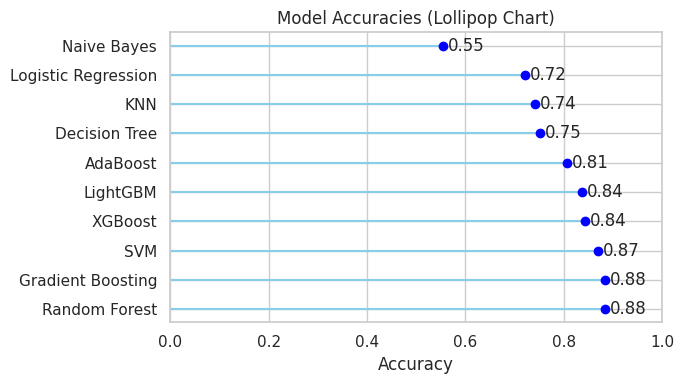

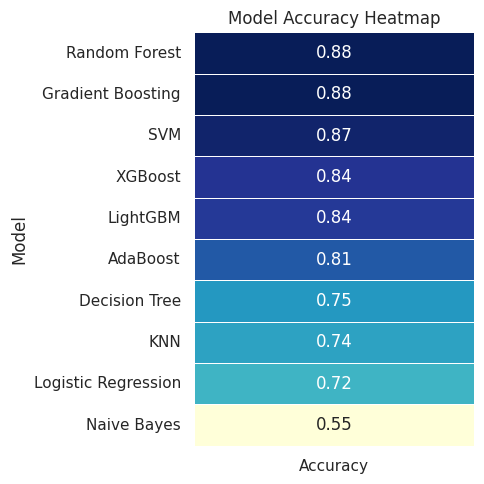

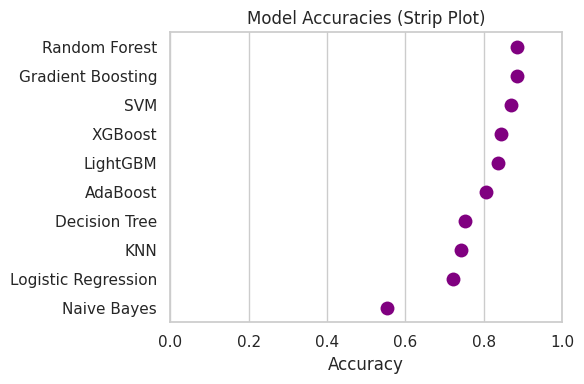

In [ ]:
# Store accuracy results for models trained with SMOTE
model_results_smote = {
    "Logistic Regression": log_acc_1,  # Accuracy for Logistic Regression with SMOTE
    "Decision Tree": dt_acc_1,         # Accuracy for Decision Tree with SMOTE
    "Random Forest": rf_acc_1,         # Accuracy for Random Forest with SMOTE
    "SVM": svm_acc_1,                  # Accuracy for SVM with SMOTE
    "KNN": knn_acc_1,                  # Accuracy for KNN with SMOTE
    "Naive Bayes": nb_acc_1,           # Accuracy for Naive Bayes with SMOTE
    "Gradient Boosting": gb_acc_1,     # Accuracy for Gradient Boosting with SMOTE
    "AdaBoost": ada_acc_1,             # Accuracy for AdaBoost with SMOTE
    "XGBoost": xgb_acc_1,              # Accuracy for XGBoost with SMOTE
    "LightGBM": lgb_acc_1             # Accuracy for LightGBM with SMOTE
}

# Sort models by accuracy (from highest to lowest)
sorted_results_smote = sorted(model_results_smote.items(), key=lambda x: x[1], reverse=True)

# Plot accuracy scores for models trained with SMOTE
plt.figure(figsize=(12, 6))
sns.barplot(x=[x[0] for x in sorted_results_smote], y=[x[1] for x in sorted_results_smote], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Model Comparison: Accuracy Scores with SMOTE")
plt.show()

plt.figure(figsize=(12, 6))
sns.stripplot(x=[x[0] for x in sorted_results_smote], y=[x[1] for x in sorted_results_smote], size=10, color='green')
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Dot Plot of Model Accuracies with SMOTE")
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Sorted data
labels = [x[0] for x in sorted_results_smote]
scores = [x[1] for x in sorted_results_smote]

# Complete the loop for radar
scores += scores[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Create radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, scores, 'o-', linewidth=2)
ax.fill(angles, scores, alpha=0.25)

# Adjust label positions
for i, label in enumerate(labels):
    angle_deg = np.degrees(angles[i])
    alignment = "left" if angle_deg < 180 else "right"
    ax.text(angles[i], 1.05, label, size=10, horizontalalignment=alignment, verticalalignment='center', rotation=angle_deg if angle_deg <= 180 else angle_deg - 180, rotation_mode='anchor')

ax.set_title("Radar Chart: Model Accuracies with SMOTE", y=1.08)
ax.set_yticklabels([])  # Optional: hide radial labels
plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Example metrics dictionary
model_metrics = {
    "Logistic Regression": {"Accuracy": 0.85, "Precision": 0.82, "Recall": 0.78},
    "Random Forest": {"Accuracy": 0.92, "Precision": 0.91, "Recall": 0.89},
    "SVM": {"Accuracy": 0.88, "Precision": 0.86, "Recall": 0.84}
}

# Convert to DataFrame
df = pd.DataFrame(model_metrics).T

# Plot grouped bars
df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison (Clustered Bar Chart)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Extract clean model names and scores from sorted_results_smote
models = [model for model, score in sorted_results_smote]
scores = [score for model, score in sorted_results_smote]

# Plot horizontal bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x=scores, y=models, palette="viridis")

# Add accuracy score labels to the bars
for i, v in enumerate(scores):
    plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center', fontsize=9)

# Final touches
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Accuracies with SMOTE", fontsize=12)
plt.xlim(0, 1)  # Accuracy scores range from 0 to 1
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.hlines(y=models, xmin=0, xmax=scores, color='skyblue')
plt.plot(scores, models, "o", color='blue')
for i, v in enumerate(scores):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center')
plt.xlabel("Accuracy")
plt.title("Model Accuracies (Lollipop Chart)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

import pandas as pd

df_heat = pd.DataFrame({"Model": models, "Accuracy": scores})
df_heat = df_heat.set_index("Model")

plt.figure(figsize=(5, 5))
sns.heatmap(df_heat, annot=True, cmap="YlGnBu", cbar=False, linewidths=0.5)
plt.title("Model Accuracy Heatmap")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.stripplot(x=scores, y=models, color='purple', size=10)
plt.xlabel("Accuracy")
plt.title("Model Accuracies (Strip Plot)")
plt.xlim(0, 1)
plt.tight_layout()
plt.show()







In [ ]:
# Create a dictionary of model objects
model_results_smote = {
    "Logistic Regression": log_acc_1,  # Accuracy for Logistic Regression with SMOTE
    "Decision Tree": dt_acc_1,         # Accuracy for Decision Tree with SMOTE
    "Random Forest": rf_acc_1,         # Accuracy for Random Forest with SMOTE
    "SVM": svm_acc_1,                  # Accuracy for SVM with SMOTE
    "KNN": knn_acc_1,                  # Accuracy for KNN with SMOTE
    "Naive Bayes": nb_acc_1,           # Accuracy for Naive Bayes with SMOTE
    "Gradient Boosting": gb_acc_1,     # Accuracy for Gradient Boosting with SMOTE
    "AdaBoost": ada_acc_1,             # Accuracy for AdaBoost with SMOTE
    "XGBoost": xgb_acc_1,              # Accuracy for XGBoost with SMOTE
    "LightGBM": lgb_acc_1             # Accuracy for LightGBM with SMOTE
}

# Identify the best model based on accuracy
best_model_name = max(model_results, key=model_results.get)
best_model = model_results_smote[best_model_name]  # Get the actual model object

print(f"Best Model: {best_model_name} with Accuracy: {model_results[best_model_name]:.4f}")


Best Model: SVM with Accuracy: 0.8707


#  Confusion Matrix

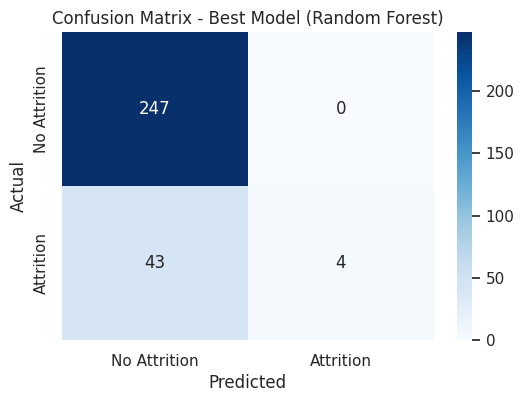

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the data (ensure consistent transformation for both train and test)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numerical features
numeric_transformer = StandardScaler()

# Preprocessing pipeline for categorical features (handle unknown categories with 'ignore')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 2: Create a pipeline for preprocessing + RandomForest
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))  # Assuming you want to use Random Forest for prediction
])

# Step 3: Fit the model on the training data
model_pipeline.fit(X_train, y_train)

# Step 4: Predict using the best model on the test data
y_pred_best = model_pipeline.predict(X_test)

# Step 5: Compute confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Step 6: Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["No Attrition", "Attrition"], yticklabels=["No Attrition", "Attrition"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Best Model (Random Forest)")
plt.show()

